# Dataset

Data source: 
https://archive.ics.uci.edu/ml/datasets/bank+marketing
    
Description:
Input variables:
### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown'

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
from mlxtend.plotting import plot_confusion_matrix

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/bank-full.csv", sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df["age_buck"] = preprocessing.buc

In [61]:
df.y.value_counts()/len(df.y)

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [21]:
target = "y"
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
y = np.where(df.y == "yes", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,        
                                    test_size = 0.3, random_state = 1)

X_train.shape

(31647, 42)

Accuracy:  0.9057062813329402
F1 score:  0.5320160995243323
Best params:  {}


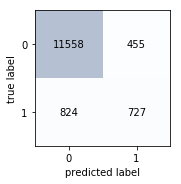

In [15]:
est = linear_model.LogisticRegression()
pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("poly", preprocessing.PolynomialFeatures(degree = 2, include_bias=False)),
    ("est", est)
])

param_grid = {
    #"est__alpha": 10 ** np.linspace(-4, -2, 5)
}

grid = grid_search.GridSearchCV(cv = 5, estimator=pipe, param_grid=param_grid)
grid.fit(X_train, y_train)

y_test_pred = grid.best_estimator_.predict(X_test)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("Accuracy: ", metrics.accuracy_score(y_test, y_test_pred))
print("F1 score: ", metrics.f1_score(y_test, y_test_pred))
print("Best params: ", grid.best_params_)

Accuracy:  0.8925095841934533
F1 score:  0.5047554347826088
Best params:  {'est__alpha': 4.6415888336127727e-10}


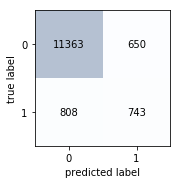

In [16]:
est = linear_model.SGDClassifier(learning_rate = "invscaling", 
                    eta0=0.5, max_iter=1000, alpha = 0.01, tol=1e-5)
pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("poly", preprocessing.PolynomialFeatures(degree = 2, include_bias=False)),
    ("est", est)
])

param_grid = {
    "est__alpha": 10 ** np.linspace(-10, -4, 10)
}

grid = grid_search.GridSearchCV(cv = 5, estimator=pipe, param_grid=param_grid)
grid.fit(X_train, y_train)

y_test_pred = grid.best_estimator_.predict(X_test)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("Accuracy: ", metrics.accuracy_score(y_test, y_test_pred))
print("F1 score: ", metrics.f1_score(y_test, y_test_pred))
print("Best params: ", grid.best_params_)

In [63]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers, losses, metrics
import keras

In [31]:
target = "y"
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
y = np.where(df.y == "yes", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,        
                                    test_size = 0.3, random_state = 1)

scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [64]:
n_x = X_train.shape[1]
num_classes = 2
batch_size = 16
epochs = 10

model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(n_x,)))
model.add(Dropout(0.1))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss= losses.categorical_crossentropy,
              optimizer=optimizers.Adam(),
              metrics=[metrics.categorical_accuracy])

history = model.fit(X_train_std, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_std, y_test))
score = model.evaluate(X_test_std, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 200)               8600      
_________________________________________________________________
dropout_65 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_66 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 2)                 402       
Total params: 49,202
Trainable params: 49,202
Non-trainable params: 0
_________________________________________________________________
Train on 31647 samples, validate on 13564 samples
Epoch 1/10
31647/31647 [==============================] - 8s 254us/step - loss: 0.2354 -